## 당뇨병 여부 판단
- 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

## Start

## 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((614, 9), (614, 2), (154, 9))

## EDA

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [5]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,id,Outcome
147,147,2,106,64,35,119,30.5,1.400,34,147,0
344,344,8,95,72,0,0,36.8,0.485,57,344,0
390,390,1,100,66,29,196,32.0,0.444,42,390,0
150,150,1,136,74,50,204,37.4,0.399,24,150,0
132,132,3,170,64,37,225,34.5,0.356,30,132,1


In [6]:
train.corr()

# Glucose, Pregnancies, BMI

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,id,Outcome
id,1.000000,-0.022639,0.001313,0.030152,0.034351,0.015921,0.027716,-0.018934,0.009647,1.000000,-0.048599
Pregnancies,-0.022639,1.000000,0.157231,0.151080,-0.086042,-0.079270,0.020483,-0.040809,0.530117,-0.022639,0.232571
Glucose,0.001313,0.157231,1.000000,0.160031,0.058158,0.313152,0.243888,0.145261,0.265131,0.001313,0.458378
BloodPressure,0.030152,0.151080,0.160031,1.000000,0.233607,0.115477,0.284482,0.049321,0.234298,0.030152,0.048623
SkinThickness,0.034351,-0.086042,0.058158,0.233607,1.000000,0.431224,0.406174,0.182880,-0.137826,0.034351,0.075839
Insulin,0.015921,-0.079270,0.313152,0.115477,0.431224,1.000000,0.214843,0.189927,-0.064915,0.015921,0.128257
BMI,0.027716,0.020483,0.243888,0.284482,0.406174,0.214843,1.000000,0.141877,0.061852,0.027716,0.296715
DiabetesPedigreeFunction,-0.018934,-0.040809,0.145261,0.049321,0.182880,0.189927,0.141877,1.000000,0.041031,-0.018934,0.174323
Age,0.009647,0.530117,0.265131,0.234298,-0.137826,-0.064915,0.061852,0.041031,1.000000,0.009647,0.218914
id,1.000000,-0.022639,0.001313,0.030152,0.034351,0.015921,0.027716,-0.018934,0.009647,1.000000,-0.048599


In [7]:
# 중복값 있는지 확인
train[train.duplicated()]

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,id,Outcome


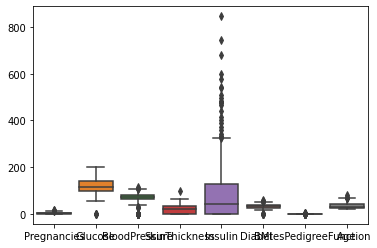

In [8]:
sns.boxplot(data=X_train.iloc[:,1:])
sns.set(rc = {'figure.figsize':(16,6)})

In [9]:
# 최소값에 0이 있는 컬럼은 중앙값으로 대체
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols_median = X_train[cols].median()
X_train[cols] = X_train[cols].replace(0, cols_median)

# X_test 도 똑같이 해주는데 Insulin은 중앙값이 0이라 평균으로 대체
cols_median = X_test[cols].median()
X_test[cols] = X_test[cols].replace(0, cols_median)

X_test['Insulin'] = X_test['Insulin'].replace(0, X_test['Insulin'].mean())

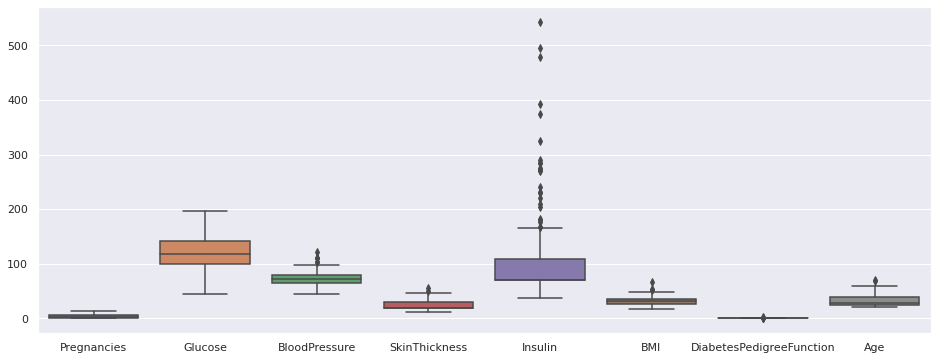

In [10]:
sns.boxplot(data=X_test.iloc[:,1:])
sns.set(rc = {'figure.figsize':(16,6)})

In [11]:
X_test.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,369.629870,3.844156,121.649351,73.266234,25.344156,109.718207,32.583117,0.449571,32.928571
std,229.725752,3.302069,31.762915,13.040932,9.352138,87.666686,7.628923,0.295059,11.041873
min,1.000000,0.000000,44.000000,44.000000,11.000000,37.000000,18.200000,0.088000,21.000000
25%,174.750000,1.000000,99.250000,65.000000,19.500000,70.110390,27.250000,0.240750,24.000000
50%,374.500000,3.000000,117.500000,72.000000,19.750000,70.110390,31.975000,0.363500,29.000000
75%,571.250000,6.000000,141.500000,80.000000,31.000000,109.000000,36.275000,0.600750,39.000000
max,767.000000,13.000000,197.000000,122.000000,56.000000,543.000000,67.100000,1.893000,70.000000


In [12]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [13]:
X_train.drop('id', axis = 1, inplace=True)
X_test.drop('id', axis = 1, inplace=True)

In [14]:
# 모델

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train['Outcome'], test_size = 0.8, random_state=60)

In [16]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

print(lr.score(X_tr, y_tr))
print(lr.score(X_val, y_val))

0.860655737704918
0.7520325203252033


In [17]:
svc = SVC()
svc.fit(X_tr, y_tr)
svc.score(X_val, y_val)

0.7378048780487805

In [18]:
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, max_depth=3,n_estimators=204, learning_rate =0.01)
xgb.fit(X_tr, y_tr)

print(xgb.score(X_tr, y_tr))
print(xgb.score(X_val, y_val))

0.9344262295081968
0.7439024390243902


In [19]:
rf = RandomForestClassifier(n_estimators=300,
                            max_features = 0.5,
                            max_depth=5,
                            min_samples_leaf=20,
                            n_jobs=-1,
                            random_state = 0)
rf.fit(X_tr, y_tr)
print(rf.score(X_tr, y_tr))
print(rf.score(X_val, y_val))

0.8442622950819673
0.725609756097561


In [20]:
param_list={'n_estimators':[100,200,300], 
            'max_features':[0.2, 0.5, 0.8], 
            'max_depth':[3,5],
            'min_samples_leaf':[10,20]}
rf = RandomForestClassifier(n_jobs=-1, random_state = 0)

grid_search = GridSearchCV(rf, param_grid=param_list, cv=5)

In [21]:
grid_search.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [0.2, 0.5, 0.8],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [100, 200, 300]})

In [22]:
#최적의 하이퍼파라미터 출력
grid_search.best_params_

{'max_depth': 3,
 'max_features': 0.8,
 'min_samples_leaf': 10,
 'n_estimators': 300}

In [23]:
#최적의 하이퍼파라미터에 따른 교차검증 점수
grid_search.best_score_

0.8276666666666668

In [24]:
#최적의 하이퍼파라미터로 학습된 모델
rf = grid_search.best_estimator_

In [25]:
rf.score(X_val, y_val)

0.7439024390243902

In [26]:
Q1 = X_train['Insulin'].quantile(0.25)
Q3 = X_train['Insulin'].quantile(0.75)
IQR = Q3-Q1

In [27]:
X_train[X_train['Insulin']< Q1-(1.5*IQR)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [28]:
train[train['Insulin']> Q3+(1.5*IQR)]

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,id,Outcome
147,147,2,106,64,35,119,30.5,1.400,34,147,0
390,390,1,100,66,29,196,32.0,0.444,42,390,0
150,150,1,136,74,50,204,37.4,0.399,24,150,0
132,132,3,170,64,37,225,34.5,0.356,30,132,1
340,340,1,130,70,13,105,25.9,0.472,22,340,0
...,...,...,...,...,...,...,...,...,...,...,...
669,669,9,154,78,30,100,30.9,0.164,45,669,0
511,511,0,139,62,17,210,22.1,0.207,21,511,0
128,128,1,117,88,24,145,34.5,0.403,40,128,1
57,57,0,100,88,60,110,46.8,0.962,31,57,0


In [29]:
Q1-(1.5*IQR)

-1.819267314016071